In [1]:
import pandas as pd
from pandas import DataFrame,Series
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv('practice.csv')

In [3]:
data.columns

Index([u'Range', u'Count', u'Base'], dtype='object')

In [4]:
data.set_index('Range', inplace=True)

In [5]:
data

,Count,Base
Range,,
0-100,881,0
100-200,456,100
200-300,449,200
300-400,403,300
400-500,350,400
500-600,362,500
600-700,309,600
700-800,277,700
800-900,247,800


In [6]:
dframe = data

In [7]:
labels = ["0"]
labels = labels + ["{0:03} - {1:03}".format(i, i+50) for i in range(0, 400, 50)]
labels

['0',
 '000 - 050',
 '050 - 100',
 '100 - 150',
 '150 - 200',
 '200 - 250',
 '250 - 300',
 '300 - 350',
 '350 - 400']

In [8]:
# labels = ["{0:03} - {1:03}".format(i, i+50) for i in range(0, 400, 50)]
# c = pd.cut(dframe['スクリーン数'], np.arange(0,401,50), right=False, labels = labels)

In [9]:
# a = dframe.groupby(c).count()
# a.rename(columns={'スクリーン数': 'count'}, inplace=True)
a = dframe

In [10]:
# a['class'] = [i for i in range(25, 376, 50)]

In [11]:
total = a['Count'].sum()

In [12]:
a['rel freq']  = a['Count'] / total
a['acc rel freq'] = a['rel freq'].cumsum()

In [13]:
# a['screen'] = dframe.groupby(c).sum()

In [14]:
# total_pop = a['screen'].sum()
a['total'] = a['Base'] * a['Count']
total = a['total'].sum()

In [15]:
a['rel pop'] = a['total'] / total
a['acc rel pop'] = a['rel pop'].cumsum()

In [16]:
a = a.fillna(0)
a

,Count,Base,rel freq,acc rel freq,total,rel pop,acc rel pop
Range,,,,,,,
0-100,881,0,0.110762,0.110762,0,0.000000,0.000000
100-200,456,100,0.057330,0.168092,45600,0.004209,0.004209
200-300,449,200,0.056450,0.224541,89800,0.008290,0.012499
300-400,403,300,0.050666,0.275207,120900,0.011160,0.023659
400-500,350,400,0.044003,0.319210,140000,0.012924,0.036583
500-600,362,500,0.045512,0.364722,181000,0.016708,0.053291
600-700,309,600,0.038848,0.403571,185400,0.017115,0.070406
700-800,277,700,0.034825,0.438396,193900,0.017899,0.088305
800-900,247,800,0.031054,0.469449,197600,0.018241,0.106546


In [17]:
b = DataFrame(a)

In [18]:
ser1 = pd.Series(0, index=['0'])
X = pd.concat([ser1,a['acc rel freq']])
Y = pd.concat([ser1,a['acc rel pop']])
X

0            0.000000
0-100        0.110762
100-200      0.168092
200-300      0.224541
300-400      0.275207
400-500      0.319210
500-600      0.364722
600-700      0.403571
700-800      0.438396
800-900      0.469449
900-1000     0.497863
1000-1200    0.555695
1200-1400    0.604099
1400-1600    0.645839
1600-1800    0.679532
1800-2000    0.708951
2000-2500    0.769676
2500-3000    0.817073
3000-4000    0.878677
4000         1.000000
dtype: float64

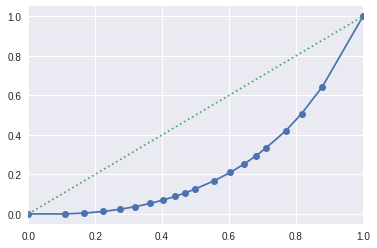

In [19]:
p = plt.subplot()
p.plot(X, Y, marker="o")

ref_x = [float(i/10.0) for i in range(11)]
ref_y = [float(i/10.0) for i in range(11)]

p.plot(ref_x, ref_y, linestyle="dotted")
p.set_xlim([0, 1.0])
plt.show()

In [20]:
a = a.fillna(0)

In [21]:
A = [0,3,3,5,5,5,5,7,7,10]

In [22]:
def gini(data):
    sub = []
    for i in range(0, len(data)-1):
        for j in range(i+1, len(data)):
            sub.append(np.abs(data[i] - data[j]))
    return float(sum(sub)*2) / (2 * (len(data) **2) * np.mean(data))
    

In [23]:
x = np.array(X)
y = np.array(Y)

In [24]:
def gini(x, y):
    area = []
    for i in range(1, len(x)):
        y_plus = y[i-1] + y[i]
        area.append(y_plus * (x[i] - x[i-1]) / 2.0)
    return (0.5 - np.sum(area))*2.0

In [25]:
gini(x, y)

0.5157656239519729